## Looking At Our Data

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [4]:
df = pd.read_csv('wines/WineQuality-WhiteWine.csv')

In [8]:
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


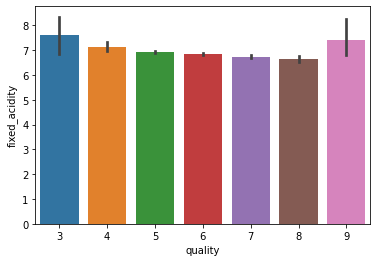

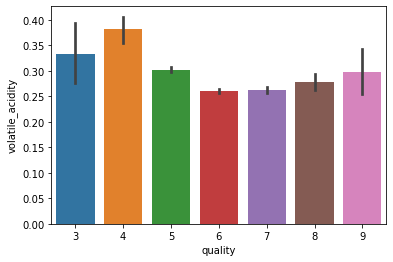

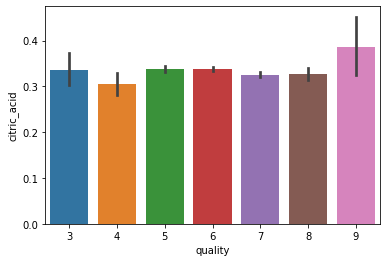

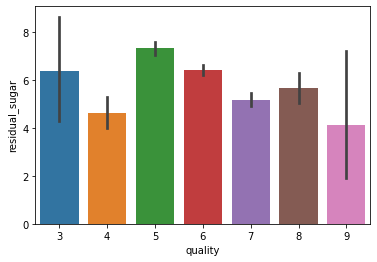

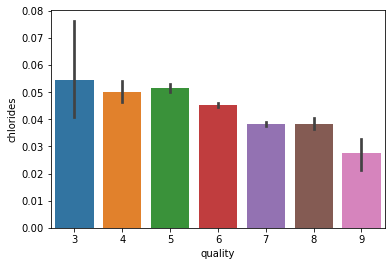

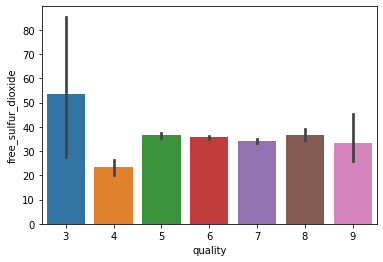

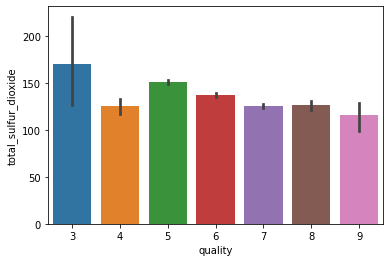

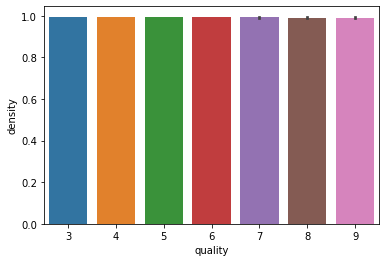

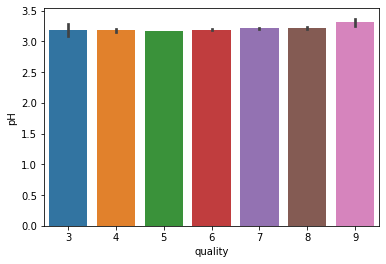

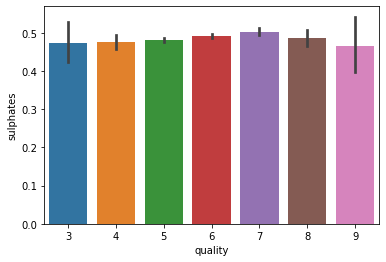

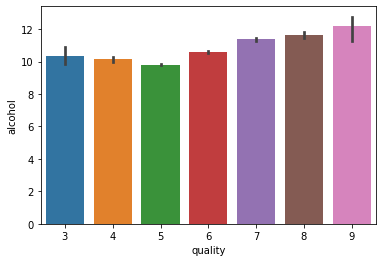

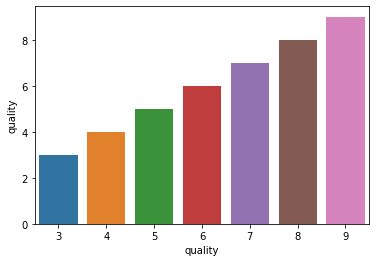

In [11]:
for column in df:
    sns.barplot(data=df, x='quality', y=column)
    plt.show()

## My First Model

In [12]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [16]:
f='quality ~ '+ '+'.join(df.columns[0:-1])
model = ols(formula=f, data=df).fit()

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.280
Method:                 Least Squares   F-statistic:                     174.3
Date:                Thu, 01 Jul 2021   Prob (F-statistic):               0.00
Time:                        08:02:00   Log-Likelihood:                -5543.7
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4886   BIC:                         1.119e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept              150.1928     18.804      7.987      0.000     113.328     187.057
fixed_acidity            0.0655      0.021      3.139      0.002       0.025       0.106
volatile_acidity        -1.8632      0.114    -16.373      0.000      -2.086      -1.640
citric_acid              0.0221      0.096      0.231      0.818      -0.166       0.210
residual_sugar           0.0815      0.008     10.825      0.000       0.067       0.096
chlorides               -0.2473      0.547     -0.452      0.651      -1.319       0.824
free_sulfur_dioxide      0.0037      0.001      4.422      0.000       0.002       0.005
total_sulfur_dioxide    -0.0003      0.000     -0.756      0.450      -0.001       0.000
density               -150.2842     19.075     -7.879      0.000    -187.679    -112.890
pH                       0.6863      0.105      6.513      0.000       0.480       0.893
sulphates                0.6315      0.100      6.291      0.000       0.435       0.828
alcohol                  0.1935      0.024      7.988      0.000       0.146       0.241
==============================================================================
Omnibus:                      114.161   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.637
Skew:                           0.073   Prob(JB):                     2.28e-55
Kurtosis:                       4.101   Cond. No.                     3.74e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.74e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

With an R-squared of 0.282, this model has plenty of room for improvement! P-values for citric acid, chlorides, and total sulfur dioxide are high, so I think it's wise to first check for collinearity.

In [18]:
predictors = df.iloc[:, :-1]

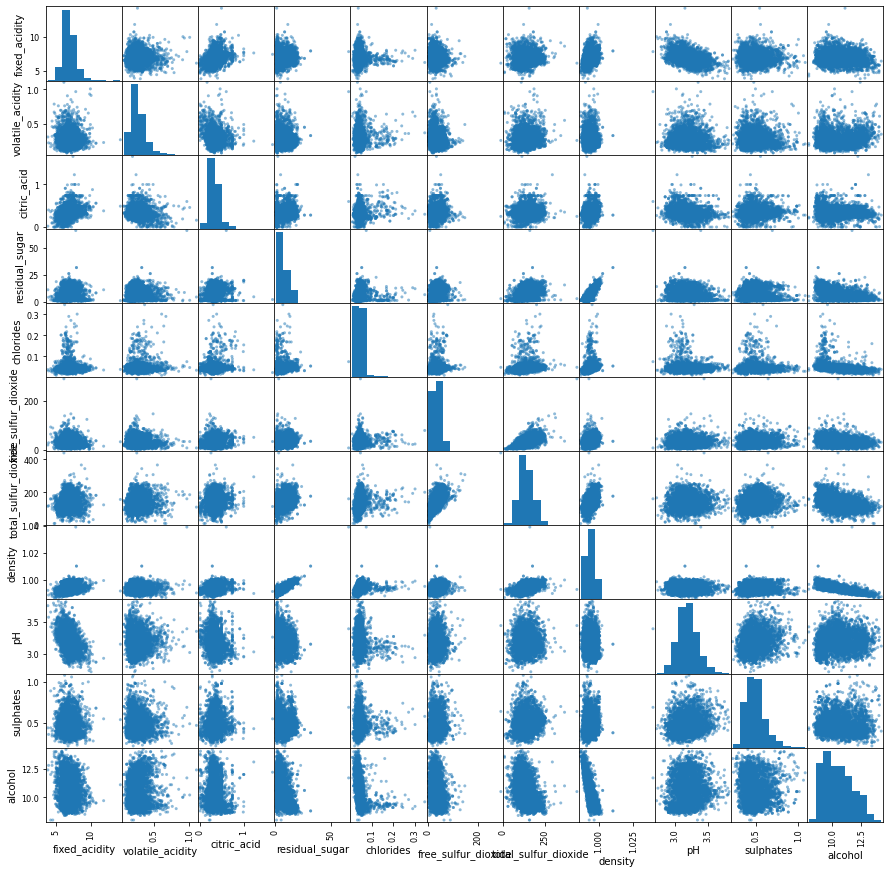

In [22]:
pd.plotting.scatter_matrix(predictors, figsize  = [15, 15]);

In [33]:
abs(predictors.corr()) >= 0.75

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
fixed_acidity,True,False,False,False,False,False,False,False,False,False,False
volatile_acidity,False,True,False,False,False,False,False,False,False,False,False
citric_acid,False,False,True,False,False,False,False,False,False,False,False
residual_sugar,False,False,False,True,False,False,False,True,False,False,False
chlorides,False,False,False,False,True,False,False,False,False,False,False
free_sulfur_dioxide,False,False,False,False,False,True,False,False,False,False,False
total_sulfur_dioxide,False,False,False,False,False,False,True,False,False,False,False
density,False,False,False,True,False,False,False,True,False,False,True
pH,False,False,False,False,False,False,False,False,True,False,False
sulphates,False,False,False,False,False,False,False,False,False,True,False


Significant correlations exist between density and residual sugar and density and alcohol. We will remove density as a variable in our next iteration.

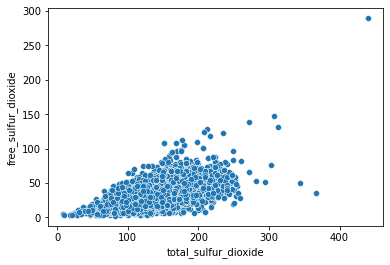

In [25]:
sns.scatterplot(data=df, x='total_sulfur_dioxide', y='free_sulfur_dioxide');

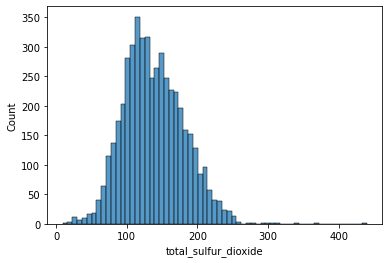

In [27]:
sns.histplot(data=df, x='total_sulfur_dioxide');

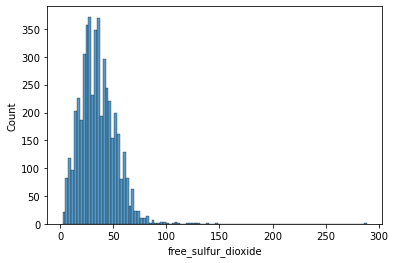

In [28]:
sns.histplot(data=df, x='free_sulfur_dioxide');

It does appear that free sulfur dioxide and total sulfur dioxide are closely correlated. Looking at the histograms for the distributions of each variable, I am going to keep total sulfur dioxide and remove free sulfur dioxide because free sulfur dioxide has a strong skew, and total sulfur dioxide is more normally distributed. 

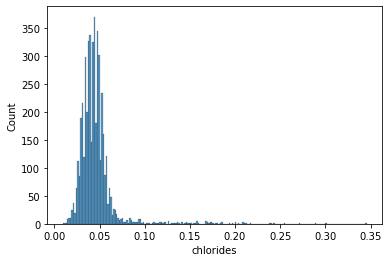

In [29]:
sns.histplot(data=df, x='chlorides');

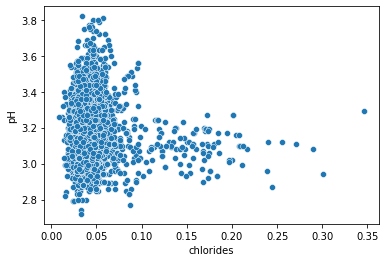

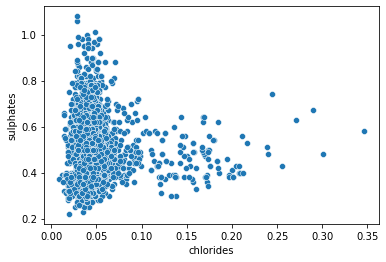

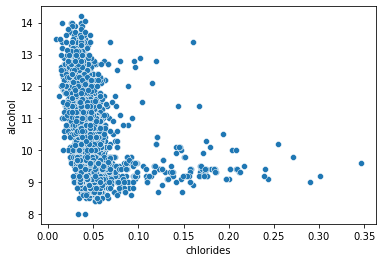

In [31]:
for column in ['pH', 'sulphates', 'alcohol']:
    sns.scatterplot(data=df, x='chlorides', y=column)
    plt.show();

Chlorides also carries a pretty significant skew, and those outliers are likely impacting the results. For now, I think I will leave chlorides alone, however, and try an iteration with just density and free sulfur dioxide removed.

## First Iteration

For the first iteration of this model we remove the variables 'density' and 'free sulfur dioxide' due to high collinearity. Our previous R-Squared was 0.282

In [37]:
iteration_1 = list(df.columns)

In [39]:
iteration_1.remove('quality')
iteration_1.remove('density')
iteration_1.remove('free_sulfur_dioxide')

In [43]:
f1 = 'quality ~ '+ '+'.join(iteration_1)
model = ols(formula=f1, data=df).fit()

In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     198.8
Date:                Thu, 01 Jul 2021   Prob (F-statistic):          5.43e-323
Time:                        08:45:39   Log-Likelihood:                -5590.8
No. Observations:                4898   AIC:                         1.120e+04
Df Residuals:                    4888   BIC:                         1.127e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                2.2169      0.348      6.365      0.000       1.534       2.900
fixed_acidity           -0.0636      0.015     -4.308      0.000      -0.093      -0.035
volatile_acidity        -2.0939      0.112    -18.748      0.000      -2.313      -1.875
citric_acid             -0.0145      0.096     -0.150      0.880      -0.204       0.175
residual_sugar           0.0270      0.003     10.611      0.000       0.022       0.032
chlorides               -0.9404      0.544     -1.728      0.084      -2.007       0.127
total_sulfur_dioxide     0.0004      0.000      1.187      0.235      -0.000       0.001
pH                       0.1374      0.083      1.662      0.097      -0.025       0.299
sulphates                0.4012      0.098      4.112      0.000       0.210       0.592
alcohol                  0.3681      0.011     32.684      0.000       0.346       0.390
==============================================================================
Omnibus:                       95.530   Durbin-Watson:                   1.622
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              192.898
Skew:                           0.074   Prob(JB):                     1.30e-42
Kurtosis:                       3.961   Cond. No.                     7.45e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Well, our previous R-squared was 0.282, and this model has an R-squared of 0.268, which is not the direction we want to be going in. P values for chlorides and total sulfur dioxide have both improved, though we have not reached the desired level of 0.05. pH and citric acid also remain at unnacceptable levels.

## Log Transformations

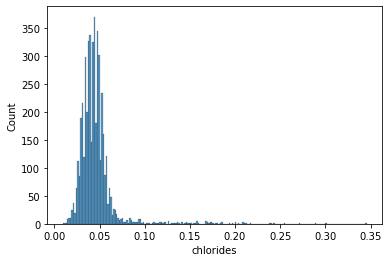

In [48]:
sns.histplot(data=df, x='chlorides');

In [51]:
predictors['chlorides_log'] = predictors['chlorides'].map(lambda x: np.log(x))

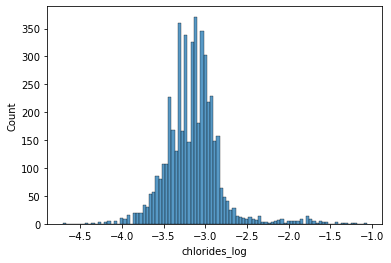

In [52]:
sns.histplot(data=predictors, x='chlorides_log');

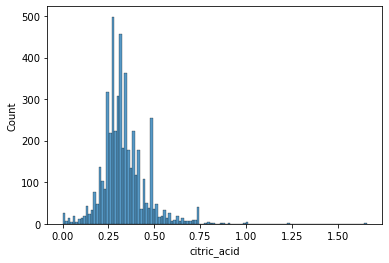

In [54]:
sns.histplot(data=df, x='citric_acid');

In [55]:
predictors['citric_acid_log'] = predictors['citric_acid'].map(lambda x: np.log(x))

<ipython-input-55-96f3b29caaf5>:1: RuntimeWarning: divide by zero encountered in log
  predictors['citric_acid_log'] = predictors['citric_acid'].map(lambda x: np.log(x))
